# Installing *dirty_cat* from source

In [1]:
# From source:
# !git clone https://github.com/dirty-cat/dirty_cat
# !pip install ./dirty_cat

# From PyPi:
# !pip install dirty_cat

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Using the library with an example: employee salaries

We will load a dataset which contains information on employees from Montgomery County, Maryland:

In [3]:
from dirty_cat.datasets import fetch_employee_salaries

dataset = fetch_employee_salaries()
# Aliases
X = dataset.X
y = dataset.y

# Pre-processing steps
X.drop(["underfilled_job_title", "department", "division"], axis="columns", inplace=True)

X.head()

,gender,department_name,assignment_category,employee_position_title,date_first_hired,year_first_hired
0,F,Department of Police,Fulltime-Regular,Office Services Coordinator,09/22/1986,1986
1,M,Department of Police,Fulltime-Regular,Master Police Officer,09/12/1988,1988
2,F,Department of Health and Human Services,Fulltime-Regular,Social Worker IV,11/19/1989,1989
3,M,Correction and Rehabilitation,Fulltime-Regular,Resident Supervisor II,05/05/2014,2014
4,M,Department of Housing and Community Affairs,Fulltime-Regular,Planning Specialist III,03/05/2007,2007


Our goal will be to predict the annual salary using this information.

## **1. Encoding dirty categorical variables**

![Encoding](photos/encoding.png)

## A problem of similarity

In [4]:
# Pick a sample with similar employee position titles
sample = X[X["employee_position_title"].str.contains("Fire|Social")].sample(n=10, random_state=50).head(10)
sample["employee_position_title"]

3096           Fire/Rescue Captain
2271       Firefighter/Rescuer III
1471              Social Worker IV
1556             Social Worker III
6331       Firefighter/Rescuer III
8668    Master Firefighter/Rescuer
7257       Firefighter/Rescuer III
3481       Firefighter/Rescuer III
3841    Master Firefighter/Rescuer
5568              Social Worker II
Name: employee_position_title, dtype: object

Let's see how `OneHotEncoder` behaves with those

In [5]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
s_enc_ohe = ohe.fit_transform(sample[["employee_position_title"]])

# Make it look nice in Jupyter by wrapping it in a DataFrame
pd.DataFrame(s_enc_ohe, columns=ohe.categories_[0], index=sample["employee_position_title"])

,Fire/Rescue Captain,Firefighter/Rescuer III,Master Firefighter/Rescuer,Social Worker II,Social Worker III,Social Worker IV
employee_position_title,,,,,,
Fire/Rescue Captain,1.0,0.0,0.0,0.0,0.0,0.0
Firefighter/Rescuer III,0.0,1.0,0.0,0.0,0.0,0.0
Social Worker IV,0.0,0.0,0.0,0.0,0.0,1.0
Social Worker III,0.0,0.0,0.0,0.0,1.0,0.0
Firefighter/Rescuer III,0.0,1.0,0.0,0.0,0.0,0.0
Master Firefighter/Rescuer,0.0,0.0,1.0,0.0,0.0,0.0
Firefighter/Rescuer III,0.0,1.0,0.0,0.0,0.0,0.0
Firefighter/Rescuer III,0.0,1.0,0.0,0.0,0.0,0.0
Master Firefighter/Rescuer,0.0,0.0,1.0,0.0,0.0,0.0


OneHot gives equidistant encodings!

# Similarity encoding: easy to understand

In [6]:
from dirty_cat import SimilarityEncoder

sim = SimilarityEncoder()
s_enc_sim = sim.fit_transform(sample[["employee_position_title"]])

pd.DataFrame(s_enc_sim, columns=sim.categories_[0], index=sample["employee_position_title"])

,Fire/Rescue Captain,Firefighter/Rescuer III,Master Firefighter/Rescuer,Social Worker II,Social Worker III,Social Worker IV
employee_position_title,,,,,,
Fire/Rescue Captain,1.000000,0.235294,0.216216,0.000000,0.000000,0.000000
Firefighter/Rescuer III,0.235294,1.000000,0.633333,0.103774,0.142857,0.054054
Social Worker IV,0.000000,0.054054,0.024390,0.777778,0.736842,1.000000
Social Worker III,0.000000,0.142857,0.023810,0.903846,1.000000,0.736842
Firefighter/Rescuer III,0.235294,1.000000,0.633333,0.103774,0.142857,0.054054
Master Firefighter/Rescuer,0.216216,0.633333,1.000000,0.024390,0.023810,0.024390
Firefighter/Rescuer III,0.235294,1.000000,0.633333,0.103774,0.142857,0.054054
Firefighter/Rescuer III,0.235294,1.000000,0.633333,0.103774,0.142857,0.054054
Master Firefighter/Rescuer,0.216216,0.633333,1.000000,0.024390,0.023810,0.024390


The similarity encoding on the other hand encodes the similarities between each category.

How? Using the **n-gram similarity**:

![Encoding](photos/ngram.png)

- $Similarity=\frac{\text{# n-grams in common}}{\text{# n-grams in total}}$
- Based on substring comparison.
- Faster than Levenshtein or Jaro-Winkler with better results.

In conclusion:

The `SimilarityEncoder` is extending the OHE logic based on the n-gram morphological similarity.

# Gamma-Poisson encoding: by topics and interpretable

In [7]:
from dirty_cat import GapEncoder

gap = GapEncoder(n_components=10, random_state=0)

pos_enc = gap.fit_transform(X[["employee_position_title"]])
print(f"Shape of encoded vectors: {pos_enc.shape}")

Shape of encoded vectors: (9228, 10)


In [8]:
# We can print the labels that were infered for each topic
topic_labels = gap.get_feature_names_out(n_labels=3)
for k, labels in enumerate(topic_labels):
    print(f"Topic n°{k}: {labels}")

Topic n°0: enforcement, equipment, engineer
Topic n°1: firefighter, rescuer, rescue
Topic n°2: community, security, health
Topic n°3: assistance, assistant, program
Topic n°4: correctional, correction, officer
Topic n°5: administrative, administration, legislative
Topic n°6: manager, school, warehouse
Topic n°7: technology, information, planning
Topic n°8: services, sergeant, service
Topic n°9: operator, bus, laboratory


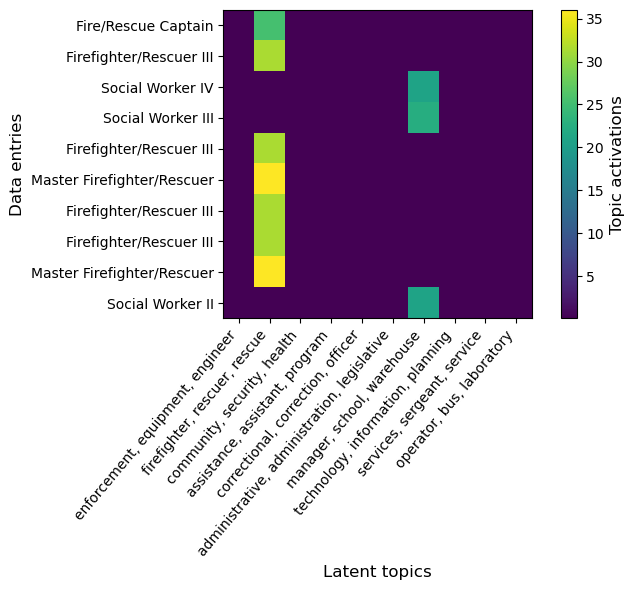

In [9]:
import matplotlib.pyplot as plt

encoded_labels = gap.transform(sample[["employee_position_title"]])
plt.figure(figsize=(8, 6))
plt.imshow(encoded_labels)
plt.xlabel("Latent topics", size=12)
plt.xticks(range(0, 10), labels=topic_labels, rotation=50, ha="right")
plt.ylabel("Data entries", size=12)
plt.yticks(range(0, 10), labels=sample[["employee_position_title"]].to_numpy().flatten())
plt.colorbar().set_label(label="Topic activations", size=12)
plt.tight_layout()
plt.show()

In conclusion:

**The `GapEncoder` extracts latent topics from categories and uses them to evaluate their similarity.**

# Min-hash encoding: very scalable

The resulting encoded category will be the intersection of its components. 

![MinHashEncoder](photos/minhash2.png)

Source: *P.Cerda, G.Varoquaux. Encoding high-cardinality string categorical variables (2019)*

**CCL: The `MinHashEncoder` is an extremely efficient encoding method based on the minhash function.**

# Comparing encoding methods

We'll run a pipeline with each encoding method we just saw, and a learner, here a `HistGradientBoostingRegressor`.

In [10]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from dirty_cat import MinHashEncoder

all_scores = dict()
all_times = dict()

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

for method in [
    ohe,
    SimilarityEncoder(),
    GapEncoder(n_components=50),
    MinHashEncoder(n_components=100),
]:
    name = method.__class__.__name__
    encoder = make_column_transformer(
        (ohe, ["gender", "department_name", "assignment_category"]),
        ("passthrough", ["year_first_hired"]),
        (method, ["employee_position_title"]),
        remainder="drop",
    )

    pipeline = make_pipeline(encoder, HistGradientBoostingRegressor())
    results = cross_validate(pipeline, X, y, cv=ShuffleSplit(n_splits=3, random_state=0))
    scores = results["test_score"]
    times = results["fit_time"]
    print(f"{name} encoding")
    print(f"R2 score:  mean: {np.mean(scores):.3f}; std: {np.std(scores):.3f}\n")
    all_times[name] = times
    all_scores[name] = scores

OneHotEncoder encoding
r2 score:  mean: 0.799; std: 0.030

SimilarityEncoder encoding
r2 score:  mean: 0.938; std: 0.008

GapEncoder encoding
r2 score:  mean: 0.930; std: 0.015

MinHashEncoder encoding
r2 score:  mean: 0.927; std: 0.012



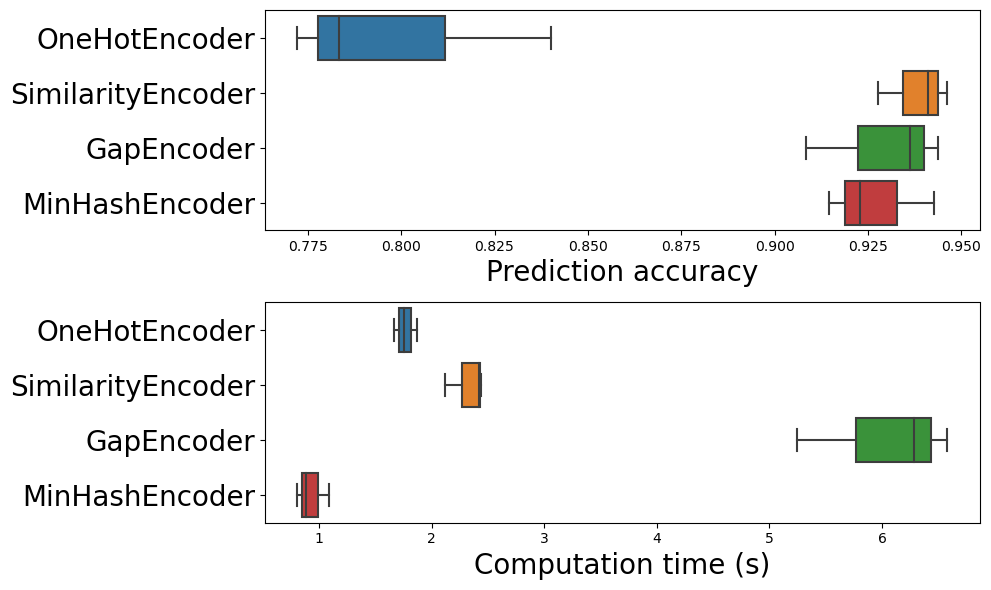

In [11]:
from seaborn import boxplot

_, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))

ax = boxplot(data=pd.DataFrame(all_scores), orient="h", ax=ax1)
ax1.set_xlabel("Prediction accuracy (R2)", size=20)
[t.set(size=20) for t in ax1.get_yticklabels()]


boxplot(data=pd.DataFrame(all_times), orient="h", ax=ax2)
ax2.set_xlabel("Computation time (s)", size=20)
[t.set(size=20) for t in ax2.get_yticklabels()]

plt.tight_layout()

# Automating the boring stuff with the `TableVectorizer`

Typically, when we want to assemble different encoders for our dataset, we'll use the `ColumnTransformer`:

In [53]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

pipeline_ct = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop="if_binary", sparse_output=False), ["gender", "department_name", "assignment_category"]),
        (MinHashEncoder(), ["employee_position_title"]),
        ("drop", ["date_first_hired"]),
        ("passthrough", ["year_first_hired"]),
        remainder="drop",
    ),
    HistGradientBoostingRegressor(),
)

In [49]:
X["date_first_hired"].head()

0    09/22/1986
1    09/12/1988
2    11/19/1989
3    05/05/2014
4    03/05/2007
Name: date_first_hired, dtype: object

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [51]:
pipeline_ct.fit(X_train, y_train)
pipeline_ct.score(X_test, y_test)
print("ColumnTransformer pipeline score:", pipeline_ct.score(X_test, y_test))

ColumnTransformer pipeline score: 0.9177451040192146


In [52]:
from dirty_cat import TableVectorizer

pipeline_tv = make_pipeline(
    TableVectorizer(),
    HistGradientBoostingRegressor(),
)

In [47]:
pipeline_tv.fit(X_train, y_train)
print("TableVectorizer pipeline score:", pipeline_tv.score(X_test, y_test))

TableVectorizer pipeline score: 0.9152092812600741


Why does it perform better? Let's see:

In [18]:
from pprint import pprint  # pretty print
print("With the ColumnTransformer:\n ")
pprint(pipeline_ct[0].transformers_)

print("\n With the TableVectorizer:\n ")
pprint(pipeline_tv[0].transformers_)

With the ColumnTransformer:
 
[('onehotencoder',
  OneHotEncoder(drop='if_binary', sparse_output=False),
  ['gender', 'department_name', 'assignment_category']),
 ('gapencoder', GapEncoder(), ['employee_position_title']),
 ('drop', 'drop', ['date_first_hired']),
 ('passthrough', 'passthrough', ['year_first_hired'])]

 With the TableVectorizer:
 
[('datetime', DatetimeEncoder(), ['date_first_hired']),
 ('low_card_cat',
  OneHotEncoder(drop='if_binary', handle_unknown='ignore'),
  ['gender', 'department_name', 'assignment_category']),
 ('high_card_cat', GapEncoder(n_components=30), ['employee_position_title']),
 ('remainder', 'passthrough', ['year_first_hired'])]


It recognized and used the datetimes (`date_first_hired`) automatically, and encoded it with `dirty_cat.DatetimeEncoder()` 😉

## Customizing the pipeline

1. Changing the encoder for a column type (`MinHashEncoder` for high cardinality categorical columns)

In [19]:
from dirty_cat import MinHashEncoder

pipeline_exp1 = make_pipeline(
    TableVectorizer(
        high_card_cat_transformer=MinHashEncoder(),
    ),
    HistGradientBoostingRegressor(),
)
pipeline_exp1.fit(X_train, y_train)
pprint(pipeline_exp1[0].transformers_)
print("TableVectorizer w/ MinHashEncoder on cat score:", pipeline_exp1.score(X_test, y_test))

[('datetime', DatetimeEncoder(), ['date_first_hired']),
 ('low_card_cat',
  OneHotEncoder(drop='if_binary', handle_unknown='ignore'),
  ['gender', 'department_name', 'assignment_category']),
 ('high_card_cat', MinHashEncoder(), ['employee_position_title']),
 ('remainder', 'passthrough', ['year_first_hired'])]
TableVectorizer w/ MinHashEncoder on cat score: 0.9149743325938295


2. Encoding a specific column (`MinHashEncoder` on `employee_position_title`)

In [20]:
# No better way of doing this currently!
pipeline_exp2 = make_pipeline(
    make_column_transformer(
        (MinHashEncoder(), ["employee_position_title"]),
        remainder=TableVectorizer(),
    ),
    HistGradientBoostingRegressor(),
)
pipeline_exp2.fit(X_train, y_train)
pprint(pipeline_exp2[0].transformers_)
print("TableVectorizer w/ MinHashEncoder on col score:", pipeline_exp2.score(X_test, y_test))

[('minhashencoder', MinHashEncoder(), ['employee_position_title']),
 ('remainder', TableVectorizer(), [0, 1, 2, 4, 5])]
TableVectorizer w/ MinHashEncoder on col score: 0.9149743325938295


TLDR: the `TableVectorizer` is simpler to use than `ColumnTransformer`, and works out of the box for most dirty tables.
It can be easily customized and supports numerical, categorical and datetime features.

Conclusion:
- The `TableVectorizer` is best to use as it's automatically taking care of the encoding choices.

## **2. Fuzzy joining tables with dirty data**

![fj](photos/fj.png)

## Better `pandas.merge`: `fuzzy_join`

In [21]:
baltimore = pd.read_csv("https://data.baltimorecity.gov/datasets/baltimore::baltimore-city-employee-salaries.csv")[["agencyName", "jobClass", "annualSalary"]]
baltimore = baltimore.groupby(by=["agencyName", "jobClass"]).mean().reset_index()
baltimore.tail()

,agencyName,jobClass,annualSalary
4035,Wage Commissioner,PROGRAM COMPLIANCE OFFICER II,50100.000000
4036,War Memorial Commission,BUILDING REPAIRER I,34745.000000
4037,War Memorial Commission,EXECECUTIVE DIRECTOR WMC,60600.000000
4038,War Memorial Commission,OFFICE ASST III,35755.000000
4039,Youth Cust,JTPA TRAINEE MOMR,15144.928177


In [22]:
pd.merge(X, baltimore, left_on='employee_position_title', right_on='jobClass')

,gender,department_name,assignment_category,employee_position_title,date_first_hired,year_first_hired,agencyName,jobClass,annualSalary


In [23]:
from dirty_cat import fuzzy_join

X2 = fuzzy_join(X, baltimore, left_on='employee_position_title', right_on='jobClass', return_score=True)
X2.head()

,gender,department_name,assignment_category,employee_position_title,date_first_hired,year_first_hired,agencyName,jobClass,annualSalary,matching_score
0,F,Department of Police,Fulltime-Regular,Office Services Coordinator,09/22/1986,1986,Health Department,SOCIAL SERVICES COORDINATOR,39549.860870,0.751711
1,M,Department of Police,Fulltime-Regular,Master Police Officer,09/12/1988,1988,Police Department,POLICE OFFICER,67604.241798,0.734803
2,F,Department of Health and Human Services,Fulltime-Regular,Social Worker IV,11/19/1989,1989,Health Department,SOCIAL WORKER II,55703.962963,0.808423
3,M,Correction and Rehabilitation,Fulltime-Regular,Resident Supervisor II,05/05/2014,2014,Baltimore City Office of Information and Techn...,OFFICE SUPERVISOR,49036.375000,0.631426
4,M,Department of Housing and Community Affairs,Fulltime-Regular,Planning Specialist III,03/05/2007,2007,Planning,CAPITAL PLANNING ANALYST,66160.000000,0.627890


In [24]:
X2[["employee_position_title", "jobClass", "matching_score"]].sort_values("matching_score").head(10)

,employee_position_title,jobClass,matching_score
7870,Locksmith,PROPERTY LOCATION SUPV,0.500000
5102,Locksmith,PROPERTY LOCATION SUPV,0.500000
5880,Messenger-Clerk,CHIEF CLERK CC,0.501368
7038,Dental Hygienist,DENTAL ASST BOARD QUALIFIED,0.518178
4639,Dental Hygienist,DENTAL ASST BOARD QUALIFIED,0.518178
5565,Dental Hygienist,DENTAL ASST BOARD QUALIFIED,0.518178
7199,Photo/Digtal Image Technician,CRIME LABORATORY PHOTO,0.525364
6884,Lead Revenue Counter,OIG LEAD AGENT,0.532517
7824,Revenue Counter,FIRE PREVENTION SPECIALIST,0.533048
2895,Revenue Counter,FIRE PREVENTION SPECIALIST,0.533048


In [25]:
X2_bis = fuzzy_join(X, baltimore, left_on='employee_position_title', right_on='jobClass', match_score=0.6)
X2_bis.head()

,gender,department_name,assignment_category,employee_position_title,date_first_hired,year_first_hired,agencyName,jobClass,annualSalary
0,F,Department of Police,Fulltime-Regular,Office Services Coordinator,09/22/1986,1986,Health Department,SOCIAL SERVICES COORDINATOR,39549.860870
1,M,Department of Police,Fulltime-Regular,Master Police Officer,09/12/1988,1988,Police Department,POLICE OFFICER,67604.241798
2,F,Department of Health and Human Services,Fulltime-Regular,Social Worker IV,11/19/1989,1989,Health Department,SOCIAL WORKER II,55703.962963
3,M,Correction and Rehabilitation,Fulltime-Regular,Resident Supervisor II,05/05/2014,2014,Baltimore City Office of Information and Techn...,OFFICE SUPERVISOR,49036.375000
4,M,Department of Housing and Community Affairs,Fulltime-Regular,Planning Specialist III,03/05/2007,2007,Planning,CAPITAL PLANNING ANALYST,66160.000000


In [26]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_bis, y, random_state=0)

pipeline_fj = make_pipeline(
    TableVectorizer(),
    HistGradientBoostingRegressor(),
)

pipeline_fj.fit(X2_train, y2_train)

print("TableVectorizer with fuzzy_join pipeline score:", pipeline_fj.score(X2_test, y2_test))

TableVectorizer with fuzzy_join pipeline score: 0.9302972516166872


# Automating the boring stuff: multiple `fuzzy_join`'s with `FeatureAugmenter`

Case of a datalake: often the case in real production settings (big companies or public institutions).

You need to join multiple tables on the initial one to add information (feature augmentation).

In [27]:
population = pd.read_csv("https://opendata.maryland.gov/api/views/sk8g-4e43/rows.csv?accessType=DOWNLOAD")
population.tail()

,Year,Population
122,2011,5828289.0
123,2012,5884563.0
124,2014,5976407.0
125,2013,5928814.0
126,2015,6006401.0


In [28]:
minimum_wage = pd.read_csv("https://raw.githubusercontent.com/Lislejoem/Minimum-Wage-by-State-1968-to-2020/master/Minimum%20Wage%20Data.csv", encoding='latin')
minimum_wage = minimum_wage[minimum_wage["State"] == 'Maryland'][["State.Minimum.Wage.2020.Dollars", "Year", "State"]]
minimum_wage.head()

,State.Minimum.Wage.2020.Dollars,Year,State
21,7.43,1968,Maryland
75,7.05,1969,Maryland
129,8.67,1970,Maryland
183,8.30,1971,Maryland
237,9.90,1972,Maryland


Repeating `fuzzy_join`'s over and over for each new table tables is painful:

We now have a class we can introduce in our ML pipeline!

In [29]:
from dirty_cat import FeatureAugmenter

faugmenter = FeatureAugmenter(tables=[
        (population, "Year"),
        (minimum_wage, "Year"),
    ],
    main_key="year_first_hired",
)

In [30]:
pipeline_fj = make_pipeline(
    faugmenter,
    TableVectorizer(),
    HistGradientBoostingRegressor(),
)

pipeline_fj.fit(X2_train, y2_train)

print("TableVectorizer with fuzzy_join pipeline score:", pipeline_fj.score(X2_test, y2_test))

TableVectorizer with fuzzy_join pipeline score: 0.9250238700239223


Conclusion:
- The `fuzzy_join` is a function that allows you to join two tables on imprecise correspondences. It is based on the n-gram morphological similarity of categories.
- The `FeatureAugmenter` can do this on multiple tables on a common join key. scikit-learn compatible, can be used in a pipeline.

## **3. Deduplicating dirty categorical variables**

![deduplicating](photos/deduplicated.png)

## Clean typos from your data with deduplication

In [31]:
from dirty_cat import deduplicate
from dirty_cat.datasets import make_deduplication_data

duplicated = make_deduplication_data(examples=['black', 'white'],
                                     entries_per_example=[5, 5],
                                     prob_mistake_per_letter=0.3,
                                     random_state=42)
duplicated

['blacb',
 'black',
 'black',
 'black',
 'black',
 'rjite',
 'white',
 'white',
 'white',
 'white']

In [32]:
deduplicate(duplicated)

blacb    black
black    black
black    black
black    black
black    black
rjite    white
white    white
white    white
white    white
white    white
dtype: object

In [33]:
deduplicate(sample["employee_position_title"])

Fire/Rescue Captain               Fire/Rescue Captain
Firefighter/Rescuer III       Firefighter/Rescuer III
Social Worker IV                     Social Worker II
Social Worker III                    Social Worker II
Firefighter/Rescuer III       Firefighter/Rescuer III
Master Firefighter/Rescuer    Firefighter/Rescuer III
Firefighter/Rescuer III       Firefighter/Rescuer III
Firefighter/Rescuer III       Firefighter/Rescuer III
Master Firefighter/Rescuer    Firefighter/Rescuer III
Social Worker II                     Social Worker II
dtype: object

Good for getting back into the OHE use case. Beware of potential losses of information.